In [60]:
from pathlib import Path
import pandas as pd
import numpy as np

# Project root (folder where this script/notebook lives)
BASE_DIR = Path().resolve()

# Data folder
DATA_DIR = BASE_DIR / "data"

# File paths
barley_path = DATA_DIR / "barley_yield_from_1982.csv"
climate_path = DATA_DIR / "climate_data_from_1982.parquet"

# Load files
barley_df = pd.read_csv(barley_path, sep=";", index_col=0)
climate_df = pd.read_parquet(climate_path)

print(barley_df.head())
print(climate_df.head())


   department  year    yield     area  production
82        Ain  1982  3.95008  16065.0     63458.0
83        Ain  1983      NaN  14500.0     38400.0
84        Ain  1984  4.82258  15500.0     74750.0
85        Ain  1985  4.19677  15500.0     65050.0
86        Ain  1986  3.59845  12900.0     46420.0
         scenario nom_dep code_dep                time  year  \
29950  historical     Ain       01 1982-01-01 12:00:00  1982   
29951  historical     Ain       01 1982-01-02 12:00:00  1982   
29952  historical     Ain       01 1982-01-03 12:00:00  1982   
29953  historical     Ain       01 1982-01-04 12:00:00  1982   
29954  historical     Ain       01 1982-01-05 12:00:00  1982   

                             metric       value  
29950  near_surface_air_temperature  276.292267  
29951  near_surface_air_temperature  275.092407  
29952  near_surface_air_temperature  276.418518  
29953  near_surface_air_temperature  278.893372  
29954  near_surface_air_temperature  278.887207  


In [4]:
barley_df.describe()

,year,yield,area,production
count,3583.000000,3336.000000,3468.000000,3461.000000
mean,1999.971532,5.212239,18767.079585,110239.297180
std,10.664744,1.369354,20266.789390,133060.332166
min,1982.000000,0.813560,0.000000,0.000000
25%,1991.000000,4.242530,3766.500000,17240.000000
50%,2000.000000,5.261230,11810.500000,56744.900000
75%,2009.000000,6.225615,27495.500000,153285.200000
max,2018.000000,8.400000,119310.000000,919249.600000


In [5]:
barley_df.info()


<class 'pandas.DataFrame'>
Index: 3583 entries, 82 to 11536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   department  3583 non-null   str    
 1   year        3583 non-null   int64  
 2   yield       3336 non-null   float64
 3   area        3468 non-null   float64
 4   production  3461 non-null   float64
dtypes: float64(3), int64(1), str(1)
memory usage: 199.8 KB


In [8]:
barley_df.isna().sum()


department      0
year            0
yield         247
area          115
production    122
dtype: int64

In [27]:
barley_df["computed_production"] = barley_df["yield"] * barley_df["area"]

barley_df[["production", "computed_production"]].corr()


,production,computed_production
production,1.000000,0.999999
computed_production,0.999999,1.000000


In [28]:
barley_df[["yield", "area", "production"]].isna().sum(axis=1).value_counts()


0    3333
1     131
3     115
2       4
Name: count, dtype: int64

In [30]:
check = barley_df.dropna(subset=["yield", "area", "production"])

(
    (check["production"] / check["area"]) - check["yield"]
).abs().describe()

count    3.333000e+03
mean     1.170071e-03
std      6.127822e-03
min      0.000000e+00
25%      1.875167e-07
50%      1.981424e-06
75%      3.562003e-06
max      5.000000e-02
dtype: float64

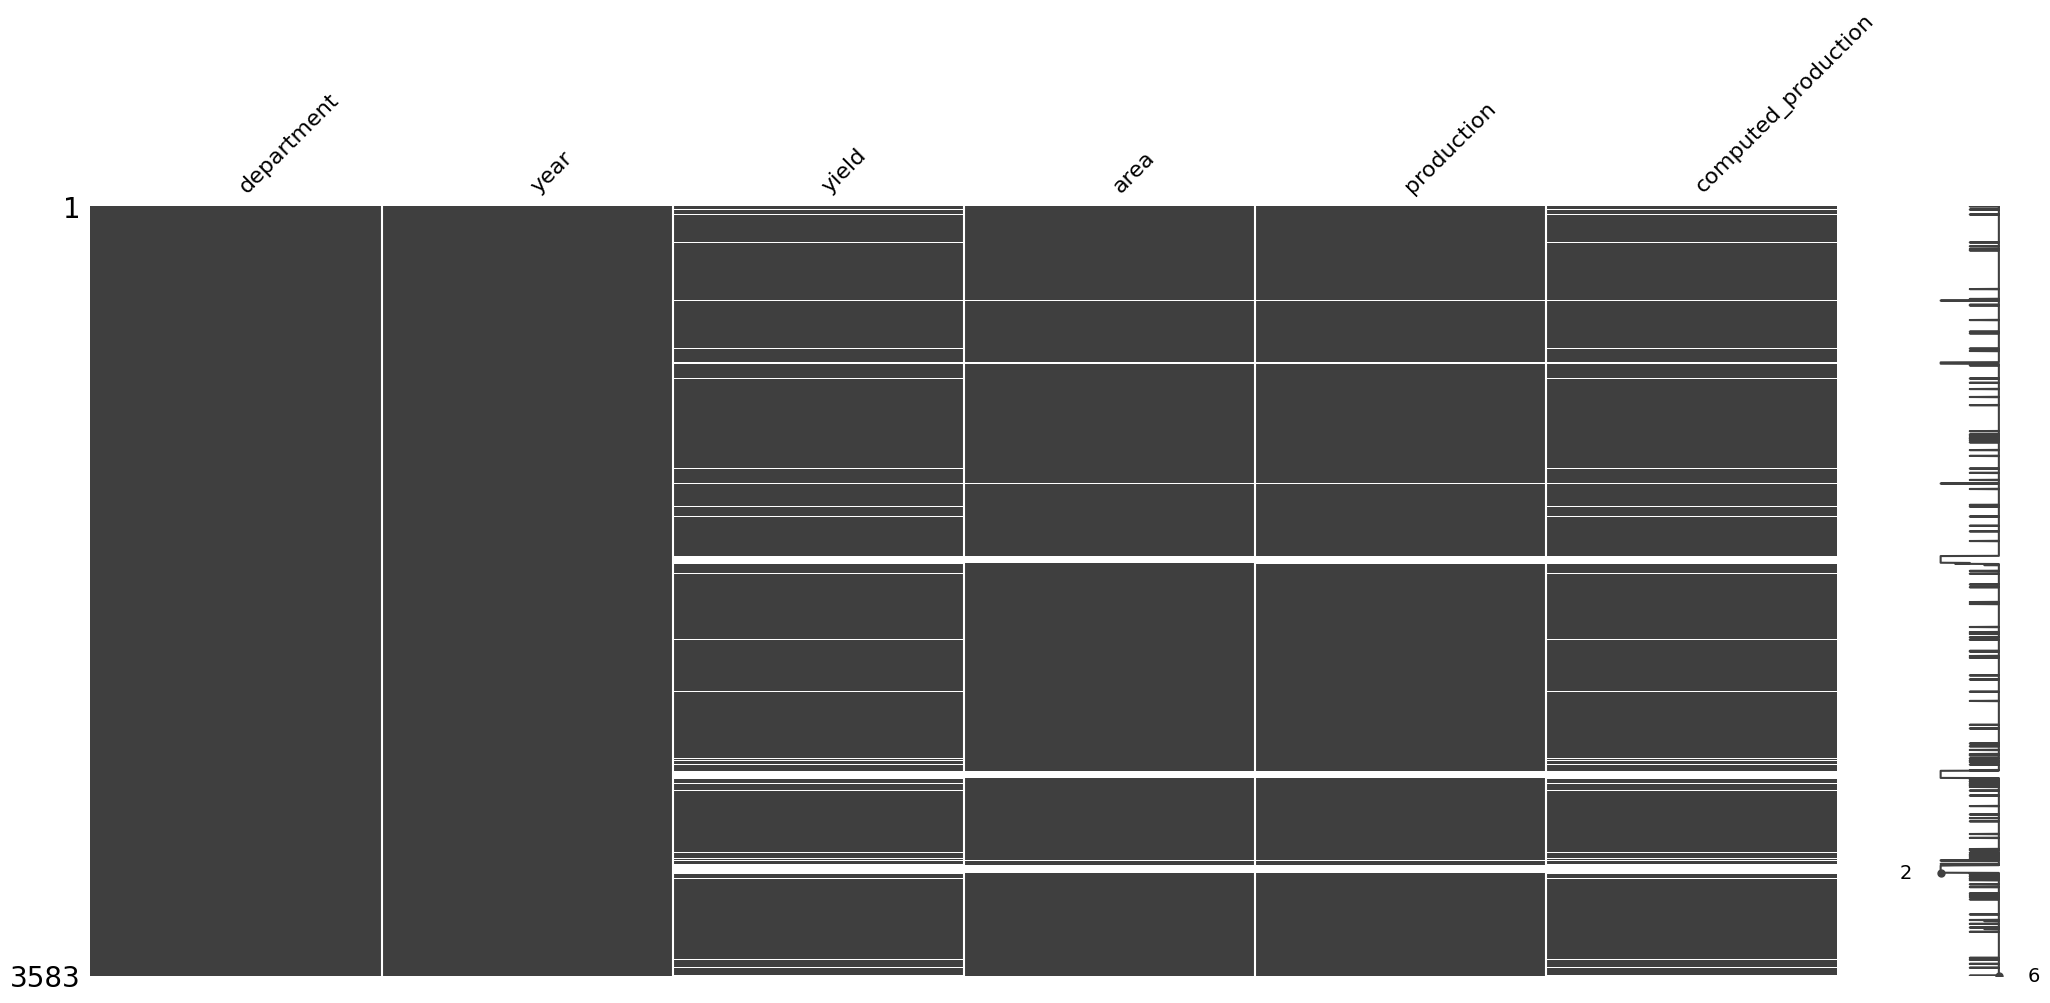

In [29]:
import missingno as msno
msno.matrix(barley_df)
plt.show()

In [9]:
barley_df.groupby("department")["yield"].agg(["mean", "std", "min", "max"])


,mean,std,min,max
department,,,,
Ain,5.469579,0.891030,3.59845,6.90000
Aisne,6.989706,0.605184,5.60000,8.40000
Allier,4.852052,0.825012,2.70789,5.95007
Alpes_Maritimes,3.254286,0.983122,0.81356,4.53704
Alpes_de_Haute_Provence,3.697194,0.488268,2.59536,4.46364
...,...,...,...,...
Vendee,5.368915,0.911777,2.82045,6.92233
Vienne,5.386209,0.832716,2.99556,6.89528
Vosges,5.396514,0.878957,2.62376,6.67500


In [11]:
climate_df.groupby("metric")["value"].describe()


,count,mean,std,min,25%,50%,75%,max
metric,,,,,,,,
daily_maximum_near_surface_air_temperature,4478308.0,288.603363,8.324001,2.532118e+02,2.824767e+02,287.805389,294.618103,319.311035
near_surface_air_temperature,4583500.0,283.964661,7.419903,2.455779e+02,2.786087e+02,283.396454,289.544655,307.876160
precipitation,4478308.0,0.000085,0.000172,-2.681981e-23,3.613616e-07,0.000013,0.000092,0.005103


In [12]:
climate_df[climate_df["metric"] == "near_surface_air_temperature"]["value"].describe()

count    4.583500e+06
mean     2.839647e+02
std      7.419903e+00
min      2.455779e+02
25%      2.786087e+02
50%      2.833965e+02
75%      2.895447e+02
max      3.078762e+02
Name: value, dtype: float64

In [13]:
barley_df

,department,year,yield,area,production
82,Ain,1982,3.95008,16065.0,63458.00
83,Ain,1983,NaN,14500.0,38400.00
84,Ain,1984,4.82258,15500.0,74750.00
85,Ain,1985,4.19677,15500.0,65050.00
86,Ain,1986,3.59845,12900.0,46420.00
...,...,...,...,...,...
11532,Yvelines,2014,7.70000,10180.0,78546.00
11533,Yvelines,2015,8.00000,11420.0,91400.50
11534,Yvelines,2016,NaN,12225.0,64792.50
11535,Yvelines,2017,7.31000,13735.0,100402.85


In [14]:
climate_df

,scenario,nom_dep,code_dep,time,year,metric,value
29950,historical,Ain,01,1982-01-01 12:00:00,1982,near_surface_air_temperature,2.762923e+02
29951,historical,Ain,01,1982-01-02 12:00:00,1982,near_surface_air_temperature,2.750924e+02
29952,historical,Ain,01,1982-01-03 12:00:00,1982,near_surface_air_temperature,2.764185e+02
29953,historical,Ain,01,1982-01-04 12:00:00,1982,near_surface_air_temperature,2.788934e+02
29954,historical,Ain,01,1982-01-05 12:00:00,1982,near_surface_air_temperature,2.788872e+02
...,...,...,...,...,...,...,...
1170256,ssp5_8_5,Yvelines,78,2050-12-27 12:00:00,2050,precipitation,3.356686e-05
1170257,ssp5_8_5,Yvelines,78,2050-12-28 12:00:00,2050,precipitation,3.531645e-06
1170258,ssp5_8_5,Yvelines,78,2050-12-29 12:00:00,2050,precipitation,4.072561e-06
1170259,ssp5_8_5,Yvelines,78,2050-12-30 12:00:00,2050,precipitation,4.087608e-09


In [ ]:
climate_df["time"] = pd.to_datetime(climate_df["time"])

In [16]:
climate_df["year"] = climate_df["time"].dt.year
climate_df.groupby("year")["value"].mean()

year
1982    190.332870
1983    189.562759
1984    189.770966
1985    189.639648
1986    190.006485
           ...    
2046    192.332672
2047    192.075363
2048    192.489761
2049    192.807068
2050    192.254700
Name: value, Length: 69, dtype: float32

In [ ]:
climate_df["scenario"].unique()

<ArrowStringArray>
['historical', 'ssp1_2_6', 'ssp2_4_5', 'ssp5_8_5']
Length: 4, dtype: str

### EDA Barley

In [31]:
mask = (
    barley_df["yield"].isna() &
    barley_df["area"].notna() &
    barley_df["production"].notna()
)

barley_df.loc[mask, "yield"] = (
    barley_df.loc[mask, "production"] /
    barley_df.loc[mask, "area"]
)
barley_df["yield"].isna().sum()

np.int64(122)

In [74]:
barley_df["department"].unique()

<ArrowStringArray>
[                    'Ain',                   'Aisne',
                  'Allier', 'Alpes_de_Haute_Provence',
         'Alpes_Maritimes',                 'Ardeche',
                'Ardennes',                  'Ariege',
                    'Aube',                    'Aude',
                 'Aveyron',                'Bas_Rhin',
        'Bouches_du_Rhone',                'Calvados',
                  'Cantal',                'Charente',
       'Charente_Maritime',                    'Cher',
                 'Correze',            'Corse_du_Sud',
               'Cote_d_Or',           'Cotes_d_Armor',
                  'Creuse',             'Deux_Sevres',
                'Dordogne',                   'Doubs',
                   'Drome',                 'Essonne',
                    'Eure',            'Eure_et_Loir',
               'Finistere',                    'Gard',
                    'Gers',                 'Gironde',
               'Haut_Rhin',             'Haute

In [34]:
barley_clean = barley_df.copy()
barley_clean = barley_clean.dropna(
    subset=["yield", "area", "production"],
    how="all"
)

In [35]:
barley_clean = barley_clean.dropna(subset=["yield"])
barley_clean["yield"].isna().sum()

np.int64(0)

In [36]:
print("Original shape:", barley_df.shape)
print("Clean shape:", barley_clean.shape)


Original shape: (3583, 6)
Clean shape: (3461, 6)


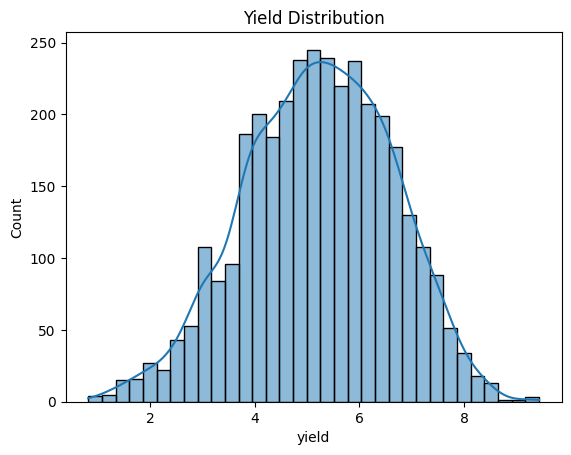

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
#yield distribution
sns.histplot(barley_clean["yield"], kde=True)
plt.title("Yield Distribution")
plt.show()

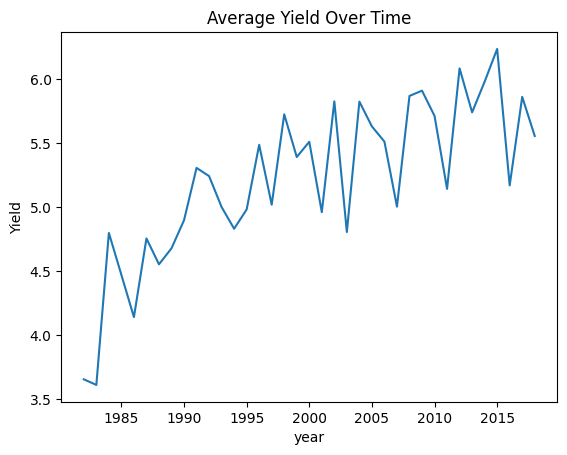

In [39]:
barley_clean.groupby("year")["yield"].mean().plot()
plt.title("Average Yield Over Time")
plt.ylabel("Yield")
plt.show()

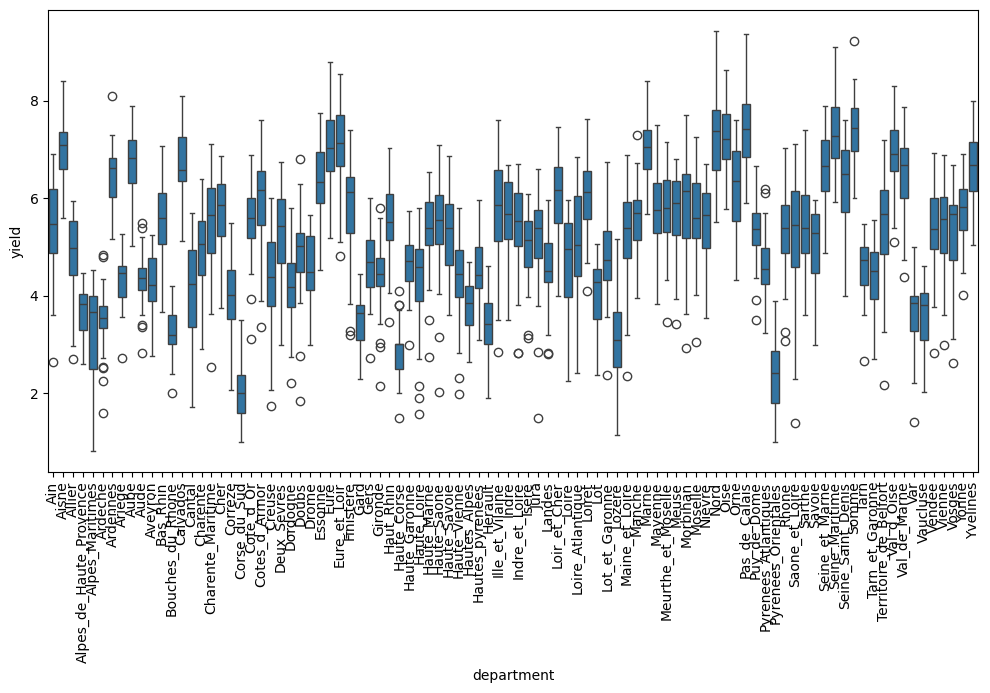

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(data=barley_clean, x="department", y="yield")
plt.xticks(rotation=90)
plt.show()


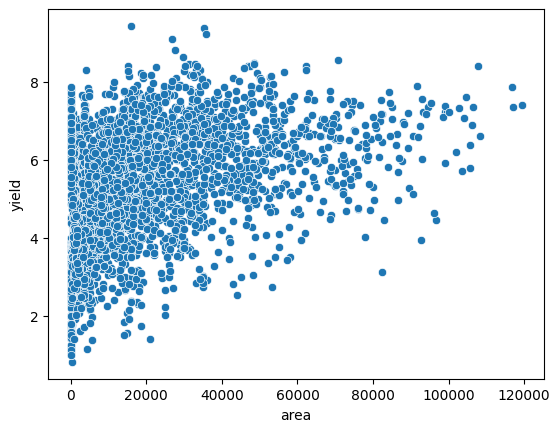

In [41]:
sns.scatterplot(data=barley_clean, x="area", y="yield")
plt.show()

In [43]:
barley_clean.groupby("year")["yield"].mean().head()
barley_clean.groupby("year")["yield"].mean().tail()


year
2014    5.980350
2015    6.236235
2016    5.170532
2017    5.861809
2018    5.556559
Name: yield, dtype: float64

### Climate EDA

In [44]:
climate_df["metric"].unique()


<ArrowStringArray>
[              'near_surface_air_temperature',
 'daily_maximum_near_surface_air_temperature',
                              'precipitation']
Length: 3, dtype: str

In [45]:
climate_hist = climate_df[climate_df["scenario"] == "historical"]
climate_future = climate_df[climate_df["scenario"] != "historical"]

In [46]:
climate_yearly = (
    climate_df
    .groupby(["scenario", "nom_dep", "year", "metric"])["value"]
    .mean()
    .reset_index()
)


In [47]:
climate_pivot = climate_yearly.pivot(
    index=["scenario", "nom_dep", "year"],
    columns="metric",
    values="value"
).reset_index()

In [48]:
climate_pivot = climate_pivot.rename(columns={"nom_dep": "department"})

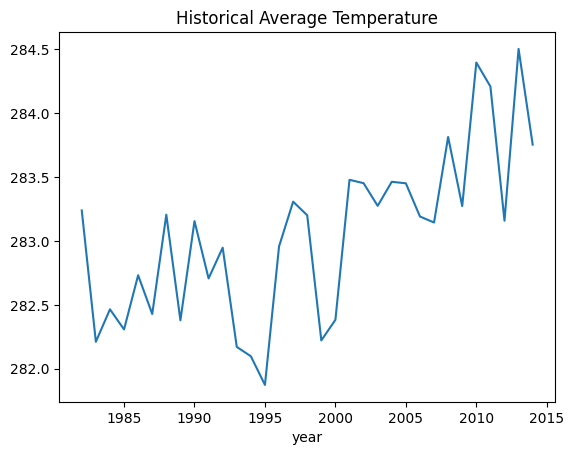

In [49]:
hist_temp = climate_pivot[
    climate_pivot["scenario"] == "historical"
]

hist_temp.groupby("year")["near_surface_air_temperature"].mean().plot()
plt.title("Historical Average Temperature")
plt.show()


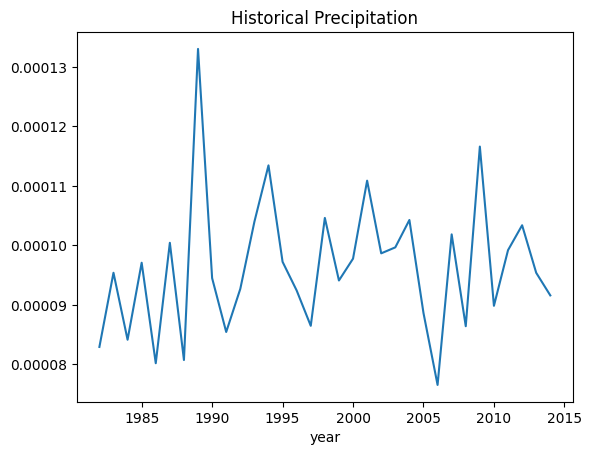

In [50]:
hist_temp.groupby("year")["precipitation"].mean().plot()
plt.title("Historical Precipitation")
plt.show()


In [52]:
avg_temp = climate_pivot.groupby(
    ["scenario", "year"]
)["near_surface_air_temperature"].mean().reset_index()


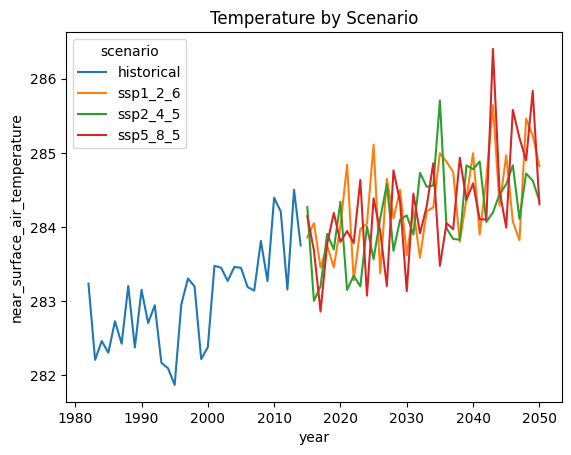

In [53]:
import seaborn as sns

sns.lineplot(
    data=avg_temp,
    x="year",
    y="near_surface_air_temperature",
    hue="scenario"
)
plt.title("Temperature by Scenario")
plt.show()


### Modeling

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
barley = barley_df.copy()

# Reconstruct yield when possible
mask = barley["yield"].isna() & barley["area"].notna() & barley["production"].notna() & (barley["area"] > 0)
barley.loc[mask, "yield"] = barley.loc[mask, "production"] / barley.loc[mask, "area"]

# Drop rows where all 3 agri vars are missing
barley = barley.dropna(subset=["yield", "area", "production"], how="all").copy()

# Target must exist
barley = barley.dropna(subset=["yield"]).copy()

# Enforce numeric types
for c in ["yield", "area", "production"]:
    barley[c] = pd.to_numeric(barley[c], errors="coerce")

barley["year"] = pd.to_numeric(barley["year"], errors="coerce").astype("Int64")

print(barley.shape)
barley[["yield","area","production"]].isna().sum()

(3461, 6)


yield         0
area          0
production    3
dtype: int64

In [56]:
climate = climate_df.copy()

climate["time"] = pd.to_datetime(climate["time"], errors="coerce")
climate["year"] = climate["time"].dt.year.astype("Int64")
climate["value"] = pd.to_numeric(climate["value"], errors="coerce")

print(climate.shape)
climate[["scenario","nom_dep","code_dep","time","year","metric","value"]].isna().sum()

(13540116, 7)


scenario    0
nom_dep     0
code_dep    0
time        0
year        0
metric      0
value       0
dtype: int64

In [57]:
w = (
    climate
    .pivot_table(
        index=["scenario","code_dep","nom_dep","time","year"],
        columns="metric",
        values="value",
        aggfunc="mean"
    )
    .reset_index()
)

w.columns.name = None
w.head()

,scenario,code_dep,nom_dep,time,year,daily_maximum_near_surface_air_temperature,near_surface_air_temperature,precipitation
0,historical,01,Ain,1982-01-01 12:00:00,1982,279.337311,276.292267,0.000033
1,historical,01,Ain,1982-01-02 12:00:00,1982,277.687225,275.092407,0.000139
2,historical,01,Ain,1982-01-03 12:00:00,1982,278.388794,276.418518,0.000091
3,historical,01,Ain,1982-01-04 12:00:00,1982,283.519043,278.893372,0.000057
4,historical,01,Ain,1982-01-05 12:00:00,1982,281.122253,278.887207,0.000257


In [58]:
# Kelvin -> Celsius
temp_cols = ["near_surface_air_temperature", "daily_maximum_near_surface_air_temperature"]
for col in temp_cols:
    if col in w.columns:
        w[col] = w[col] - 273.15

# precip (mm/s) -> mm/day
if "precipitation" in w.columns:
    w["precipitation_mm_day"] = w["precipitation"] * 86400.0

w[["near_surface_air_temperature","daily_maximum_near_surface_air_temperature","precipitation_mm_day"]].describe()

,near_surface_air_temperature,daily_maximum_near_surface_air_temperature,precipitation_mm_day
count,4.583500e+06,4.478308e+06,4.478308e+06
mean,1.081467e+01,1.545337e+01,7.338108e+00
std,7.419903e+00,8.324001e+00,1.481961e+01
min,-2.757205e+01,-1.993820e+01,-2.317232e-18
25%,5.458740e+00,9.326752e+00,3.122164e-02
50%,1.024646e+01,1.465540e+01,1.155305e+00
75%,1.639466e+01,2.146811e+01,7.960360e+00
max,3.472617e+01,4.616104e+01,4.409006e+02


In [61]:
GROW_START, GROW_END = 3, 7   # Mar..Jul
TBASE = 5.0
HEAT_TH = 30.0
DRY_TH = 1.0  # mm/day

w["month"] = w["time"].dt.month
gs = w[(w["month"] >= GROW_START) & (w["month"] <= GROW_END)].copy()

# Hot day indicator
gs["hot_day"] = (gs["daily_maximum_near_surface_air_temperature"] > HEAT_TH).astype(int)

# Dry day indicator
gs["dry_day"] = (gs["precipitation_mm_day"] < DRY_TH).astype(int)

# Growing degree days per day
gs["gdd_day"] = np.maximum(gs["near_surface_air_temperature"] - TBASE, 0.0)

gs.head()

,scenario,code_dep,nom_dep,time,year,daily_maximum_near_surface_air_temperature,near_surface_air_temperature,precipitation,precipitation_mm_day,month,hot_day,dry_day,gdd_day
59,historical,01,Ain,1982-03-01 12:00:00,1982,4.657684,2.936859,0.000502,43.401073,3,0,0,0.0
60,historical,01,Ain,1982-03-02 12:00:00,1982,-0.897095,-2.615814,0.000091,7.823861,3,0,0,0.0
61,historical,01,Ain,1982-03-03 12:00:00,1982,1.588470,-1.741486,0.000003,0.288050,3,0,1,0.0
62,historical,01,Ain,1982-03-04 12:00:00,1982,7.511322,4.051758,0.000091,7.899230,3,0,0,0.0
63,historical,01,Ain,1982-03-05 12:00:00,1982,8.094208,4.353790,0.000091,7.891322,3,0,0,0.0


In [62]:
def max_consecutive_ones(x: pd.Series) -> int:
    run = 0
    best = 0
    for v in x.values:
        if v == 1:
            run += 1
            best = max(best, run)
        else:
            run = 0
    return best

In [63]:
feat = (
    gs.groupby(["scenario","code_dep","nom_dep","year"], as_index=False)
      .agg(
          tmean_gs=("near_surface_air_temperature","mean"),
          tmax_gs=("daily_maximum_near_surface_air_temperature","mean"),
          prcp_gs=("precipitation_mm_day","sum"),
          hot_days=("hot_day","sum"),
          gdd=("gdd_day","sum"),
          max_consec_dry=("dry_day", max_consecutive_ones),
          n_days=("dry_day","size")
      )
)

feat.head()

,scenario,code_dep,nom_dep,year,tmean_gs,tmax_gs,prcp_gs,hot_days,gdd,max_consec_dry,n_days
0,historical,01,Ain,1982,11.995357,16.836538,1098.971313,3,1115.857788,8,153
1,historical,01,Ain,1983,11.331988,16.087030,1080.625122,0,1029.932861,12,153
2,historical,01,Ain,1984,11.959189,16.997242,1156.371826,0,1087.771729,7,153
3,historical,01,Ain,1985,11.119705,15.996710,1166.247559,0,970.348083,14,153
4,historical,01,Ain,1986,11.808128,16.717556,893.017456,0,1068.690063,20,153


In [64]:
import unicodedata, re

def norm_dep(s: str) -> str:
    s = str(s)
    s = unicodedata.normalize("NFKD", s).encode("ascii","ignore").decode("ascii")
    s = s.lower().replace("'", "")
    s = re.sub(r"[\s\-]+", "_", s)
    s = re.sub(r"[^a-z0-9_]", "", s)
    return s

barley = barley.copy()
feat = feat.copy()

barley["dep_norm"] = barley["department"].map(norm_dep)
feat["dep_norm"] = feat["nom_dep"].map(norm_dep)

barley[["department","dep_norm"]].drop_duplicates().head(10)

,department,dep_norm
82,Ain,ain
201,Aisne,aisne
320,Allier,allier
439,Alpes_de_Haute_Provence,alpes_de_haute_provence
558,Alpes_Maritimes,alpes_maritimes
677,Ardeche,ardeche
796,Ardennes,ardennes
915,Ariege,ariege
1034,Aube,aube
1153,Aude,aude


In [65]:
feat_hist = feat[feat["scenario"] == "historical"].copy()

train_df = barley.merge(
    feat_hist,
    on=["dep_norm","year"],
    how="inner"
)

print(train_df.shape)
train_df.head()

(2935, 17)


,department,year,yield,area,production,computed_production,dep_norm,scenario,code_dep,nom_dep,tmean_gs,tmax_gs,prcp_gs,hot_days,gdd,max_consec_dry,n_days
0,Ain,1982,3.950080,16065.0,63458.0,63458.0352,ain,historical,01,Ain,11.995357,16.836538,1098.971313,3,1115.857788,8,153
1,Ain,1983,2.648276,14500.0,38400.0,NaN,ain,historical,01,Ain,11.331988,16.087030,1080.625122,0,1029.932861,12,153
2,Ain,1984,4.822580,15500.0,74750.0,74749.9900,ain,historical,01,Ain,11.959189,16.997242,1156.371826,0,1087.771729,7,153
3,Ain,1985,4.196770,15500.0,65050.0,65049.9350,ain,historical,01,Ain,11.119705,15.996710,1166.247559,0,970.348083,14,153
4,Ain,1986,3.598450,12900.0,46420.0,46420.0050,ain,historical,01,Ain,11.808128,16.717556,893.017456,0,1068.690063,20,153


In [66]:
feature_cols_base = ["tmean_gs","tmax_gs","prcp_gs","hot_days","gdd","max_consec_dry"]
target_col = "yield"

df = train_df.dropna(subset=feature_cols_base + [target_col]).copy()

test_start_year = 2011
tr = df[df["year"] < test_start_year].copy()
te = df[df["year"] >= test_start_year].copy()

print("Train:", tr.shape, " | Test:", te.shape)
print("Train years:", int(tr["year"].min()), "-", int(tr["year"].max()))
print("Test years :", int(te["year"].min()), "-", int(te["year"].max()))

Train: (2581, 17)  | Test: (354, 17)
Train years: 1982 - 2010
Test years : 2011 - 2014


<Axes: >

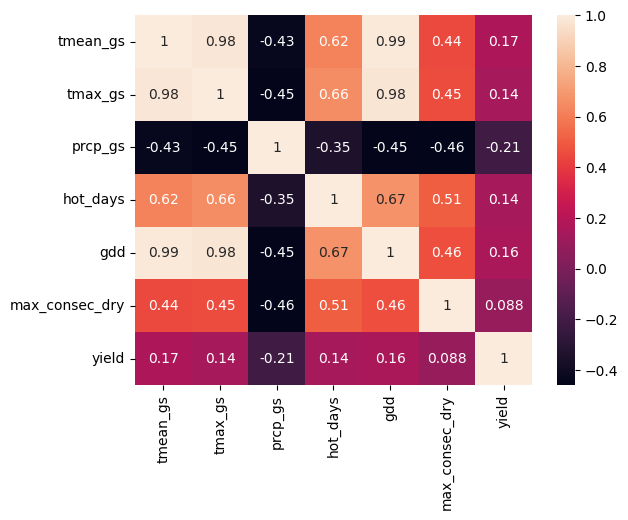

In [82]:
import seaborn as sns
sns.heatmap(train_df[feature_cols_base + ["yield"]].corr(), annot=True)


In [67]:
dep_mean = tr.groupby("dep_norm")[target_col].mean()

pred_baseline = te["dep_norm"].map(dep_mean)
mae_baseline = mean_absolute_error(te[target_col], pred_baseline)

print("Baseline MAE (dep mean):", mae_baseline)

Baseline MAE (dep mean): 0.7904304046044516


In [68]:
from xgboost import XGBRegressor

X_tr = tr[feature_cols_base]
y_tr = tr[target_col]
X_te = te[feature_cols_base]
y_te = te[target_col]

xgb = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_tr, y_tr)
pred = xgb.predict(X_te)

mae = mean_absolute_error(y_te, pred)
rmse = mean_squared_error(y_te, pred) ** 0.5
r2 = r2_score(y_te, pred)

print("XGB MAE :", mae)
print("XGB RMSE:", rmse)
print("XGB R2  :", r2)

XGB MAE : 1.0137384799407168
XGB RMSE: 1.2587505693919443
XGB R2  : 0.014890426294653758


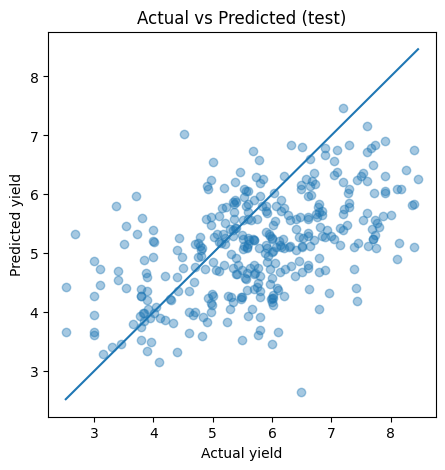

In [69]:
plt.figure(figsize=(5,5))
plt.scatter(y_te, pred, alpha=0.4)
plt.xlabel("Actual yield")
plt.ylabel("Predicted yield")
plt.title("Actual vs Predicted (test)")
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()])
plt.show()

In [70]:
feature_cols_plus = feature_cols_base + ["year"]

tr_plus = tr[feature_cols_plus + ["dep_norm", target_col]].copy()
te_plus = te[feature_cols_plus + ["dep_norm", target_col]].copy()

X_tr2 = pd.get_dummies(tr_plus[feature_cols_plus + ["dep_norm"]], columns=["dep_norm"], drop_first=True)
X_te2 = pd.get_dummies(te_plus[feature_cols_plus + ["dep_norm"]], columns=["dep_norm"], drop_first=True)

# Align columns
X_te2 = X_te2.reindex(columns=X_tr2.columns, fill_value=0)

y_tr2 = tr_plus[target_col]
y_te2 = te_plus[target_col]

xgb2 = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb2.fit(X_tr2, y_tr2)
pred2 = xgb2.predict(X_te2)

print("XGB+year+dep MAE :", mean_absolute_error(y_te2, pred2))
print("XGB+year+dep RMSE:", mean_squared_error(y_te2, pred2) ** 0.5)
print("XGB+year+dep R2  :", r2_score(y_te2, pred2))

XGB+year+dep MAE : 0.5432073105033767
XGB+year+dep RMSE: 0.6786055792029188
XGB+year+dep R2  : 0.713687683003495


In [71]:
scenarios = ["ssp1_2_6","ssp2_4_5","ssp5_8_5"]
future_feat = feat[feat["scenario"].isin(scenarios)].dropna(subset=feature_cols_base).copy()

# include year + dep_norm encoding
future_feat["year"] = future_feat["year"].astype("Int64")
X_future = pd.get_dummies(
    future_feat[feature_cols_plus + ["dep_norm"]],
    columns=["dep_norm"],
    drop_first=True
)

X_future = X_future.reindex(columns=X_tr2.columns, fill_value=0)
future_feat["pred_yield"] = xgb2.predict(X_future)

future_feat.head()

,scenario,code_dep,nom_dep,year,tmean_gs,tmax_gs,prcp_gs,hot_days,gdd,max_consec_dry,n_days,dep_norm,pred_yield
2937,ssp1_2_6,01,Ain,2015,13.263169,18.679577,892.335144,4,1294.023438,17,153,ain,6.297297
2938,ssp1_2_6,01,Ain,2016,13.131767,18.152515,1146.179565,2,1250.838623,11,153,ain,6.076293
2939,ssp1_2_6,01,Ain,2017,12.833161,17.885670,928.741028,0,1208.664551,5,153,ain,6.060443
2940,ssp1_2_6,01,Ain,2018,12.809212,17.919216,1271.843384,1,1199.781372,7,153,ain,6.200750
2941,ssp1_2_6,01,Ain,2019,11.779666,16.699438,1001.862915,2,1090.855957,13,153,ain,6.200649


In [72]:
baseline_years = (2010, 2018)

baseline = (
    barley[(barley["year"]>=baseline_years[0]) & (barley["year"]<=baseline_years[1])]
    .groupby("dep_norm", as_index=False)["yield"].mean()
    .rename(columns={"yield":"baseline_yield"})
)

proj = future_feat.merge(baseline, on="dep_norm", how="left")
proj["yield_change_pct"] = (proj["pred_yield"] - proj["baseline_yield"]) / proj["baseline_yield"] * 100

proj[["scenario","nom_dep","year","pred_yield","baseline_yield","yield_change_pct"]].head(10)

,scenario,nom_dep,year,pred_yield,baseline_yield,yield_change_pct
0,ssp1_2_6,Ain,2015,6.297297,6.142131,2.526255
1,ssp1_2_6,Ain,2016,6.076293,6.142131,-1.071910
2,ssp1_2_6,Ain,2017,6.060443,6.142131,-1.329957
3,ssp1_2_6,Ain,2018,6.200750,6.142131,0.954379
4,ssp1_2_6,Ain,2019,6.200649,6.142131,0.952734
5,ssp1_2_6,Ain,2020,5.660616,6.142131,-7.839538
6,ssp1_2_6,Ain,2021,5.638839,6.142131,-8.194092
7,ssp1_2_6,Ain,2022,6.156381,6.142131,0.231997
8,ssp1_2_6,Ain,2023,6.194854,6.142131,0.858378
9,ssp1_2_6,Ain,2024,6.089474,6.142131,-0.857315


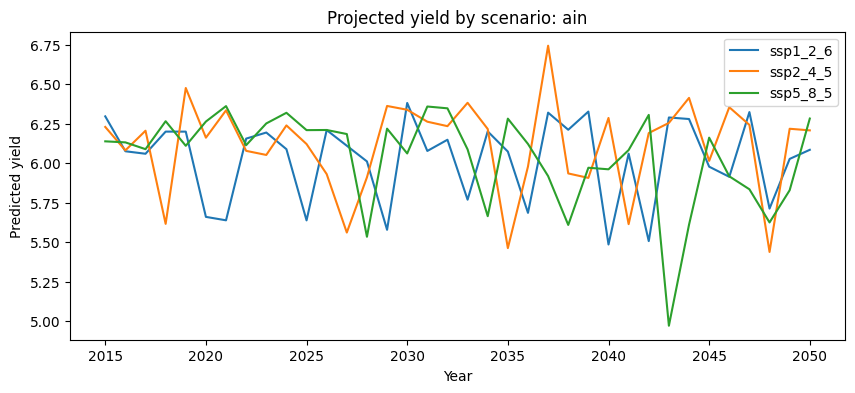

In [73]:
dep_show = "ain"
p = proj[proj["dep_norm"] == dep_show].copy()

plt.figure(figsize=(10,4))
for sc, g in p.groupby("scenario"):
    g = g.sort_values("year")
    plt.plot(g["year"], g["pred_yield"], label=sc)
plt.title(f"Projected yield by scenario: {dep_show}")
plt.xlabel("Year")
plt.ylabel("Predicted yield")
plt.legend()
plt.show()

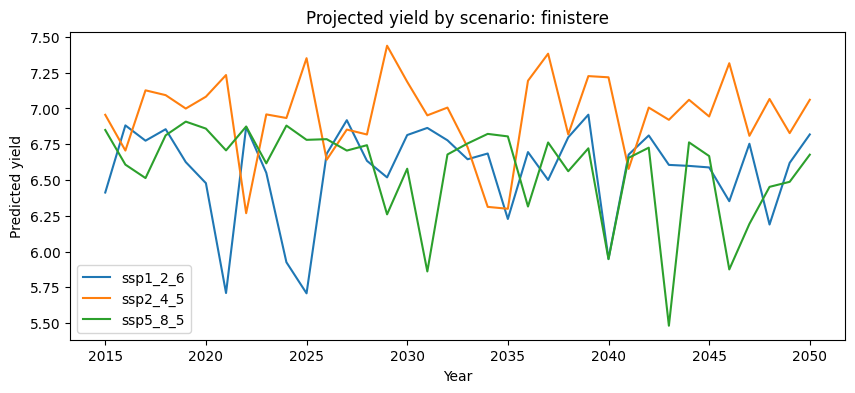

In [76]:
dep_show = "finistere"
p = proj[proj["dep_norm"] == dep_show].copy()

plt.figure(figsize=(10,4))
for sc, g in p.groupby("scenario"):
    g = g.sort_values("year")
    plt.plot(g["year"], g["pred_yield"], label=sc)
plt.title(f"Projected yield by scenario: {dep_show}")
plt.xlabel("Year")
plt.ylabel("Predicted yield")
plt.legend()
plt.show()

In [77]:
climate_pivot.groupby(["scenario","year"])["near_surface_air_temperature"].mean().unstack("scenario")

scenario,historical,ssp1_2_6,ssp2_4_5,ssp5_8_5
year,,,,
1982,283.238708,NaN,NaN,NaN
1983,282.210480,NaN,NaN,NaN
1984,282.464844,NaN,NaN,NaN
1985,282.307281,NaN,NaN,NaN
1986,282.731689,NaN,NaN,NaN
...,...,...,...,...
2046,NaN,284.072998,284.832672,285.579651
2047,NaN,283.824493,284.111176,285.200623
2048,NaN,285.461517,284.722626,284.901886


In [78]:
proj.groupby(["scenario"])["pred_yield"].mean()

scenario
ssp1_2_6    5.828856
ssp2_4_5    5.986381
ssp5_8_5    5.843393
Name: pred_yield, dtype: float32

In [79]:
proj.groupby("scenario")["pred_yield"].std()

scenario
ssp1_2_6    1.094868
ssp2_4_5    1.049104
ssp5_8_5    1.088489
Name: pred_yield, dtype: float32

<Axes: xlabel='year'>

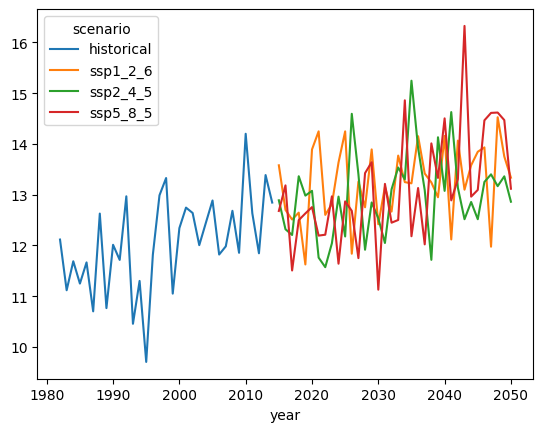

In [83]:
feat.groupby(["scenario","year"])["tmean_gs"].mean().unstack("scenario").plot()

In [85]:
# Cell — quick sanity checks on stress features (overall + by scenario)
stress_cols = ["hot_days", "max_consec_dry", "prcp_gs", "tmean_gs", "tmax_gs", "gdd"]

print("Rows in feat:", feat.shape)
print("Scenarios:", feat["scenario"].unique())

feat[stress_cols].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).T

Rows in feat: (12549, 12)
Scenarios: <ArrowStringArray>
['historical', 'ssp1_2_6', 'ssp2_4_5', 'ssp5_8_5']
Length: 4, dtype: str


,count,mean,std,min,1%,5%,50%,95%,99%,max
hot_days,12549.0,8.529763,9.103153,0.000000,0.000000,0.000000,6.000000,27.000000,38.000000,60.000000
max_consec_dry,12549.0,13.055542,6.449729,0.000000,0.000000,6.000000,12.000000,25.000000,34.000000,92.000000
prcp_gs,12549.0,1039.492065,599.265381,0.000000,0.000000,264.853772,957.997864,2168.205420,2814.562998,4314.158203
tmean_gs,12549.0,12.863441,2.229576,1.426897,4.768463,8.970009,13.079230,15.944336,17.283214,19.857826
tmax_gs,12261.0,17.827808,2.457047,5.465660,9.903169,13.706093,17.987717,21.408092,23.126554,26.001297
gdd,12549.0,1251.415283,284.788086,173.488831,404.580128,747.699536,1267.916992,1683.058105,1883.275029,2273.247559


In [86]:
# Cell — % of zeros (if hot_days is ~all zeros, your HEAT_TH/season is too strict)
zero_rates = (feat[["hot_days", "max_consec_dry"]] == 0).mean().sort_values(ascending=False)
zero_rates.rename("share_zero")


hot_days          0.224002
max_consec_dry    0.022950
Name: share_zero, dtype: float64

In [87]:
# Cell — distribution by scenario (min/median/max + key percentiles)
feat.groupby("scenario")[["hot_days", "max_consec_dry"]].describe(
    percentiles=[0.05, 0.5, 0.95]
).swaplevel(0,1,axis=1).sort_index(axis=1)


5%                     50%                     95%  \
           hot_days max_consec_dry hot_days max_consec_dry hot_days   
scenario                                                              
historical      0.0            6.0      3.0           11.0     18.0   
ssp1_2_6        0.0            6.0      7.0           12.0     25.0   
ssp2_4_5        0.0            0.0      6.0           13.0     30.0   
ssp5_8_5        0.0            6.0      7.0           12.0     29.0   

                             count                     max                 \
           max_consec_dry hot_days max_consec_dry hot_days max_consec_dry   
scenario                                                                    
historical           22.0   2937.0         2937.0     37.0           43.0   
ssp1_2_6             23.0   3204.0         3204.0     48.0           44.0   
ssp2_4_5             28.0   3204.0         3204.0     60.0           92.0   
ssp5_8_5             24.0   3204.0         3204.0     54.0           52.0   

                mean                     min                       std  \
            hot_days max_consec_dry hot_days max_consec_dry   hot_days   
scenario                                                                 
historical  5.110998      12.152196      0.0            3.0   6.447699   
ssp1_2_6    9.181648      13.196005      0.0            3.0   8.376414   
ssp2_4_5    9.711298      13.821785      0.0            0.0  10.457919   
ssp5_8_5    9.830212      12.976904      0.0            2.0   9.631675   

                           
           max_consec_dry  
scenario                   
historical       5.258216  
ssp1_2_6         5.534354  
ssp2_4_5         8.665160  
ssp5_8_5         5.526998

In [88]:
# Cell — distribution by year (helps see if stress grows over time in SSPs)
tmp = (
    feat.groupby(["scenario", "year"], as_index=False)[["hot_days", "max_consec_dry"]]
    .agg(["mean", "median", "max"])
)
tmp.head()


scenario  year  hot_days            max_consec_dry           
                         mean median max           mean median max
0  historical  1982  7.617978    6.0  22      13.258427   14.0  20
1  historical  1983  1.022472    0.0   8      11.516854   11.0  22
2  historical  1984  1.089888    1.0   9      10.000000   10.0  16
3  historical  1985  2.831461    2.0  17      16.808989   14.0  34
4  historical  1986  2.202247    1.0  25      10.685393    9.0  26

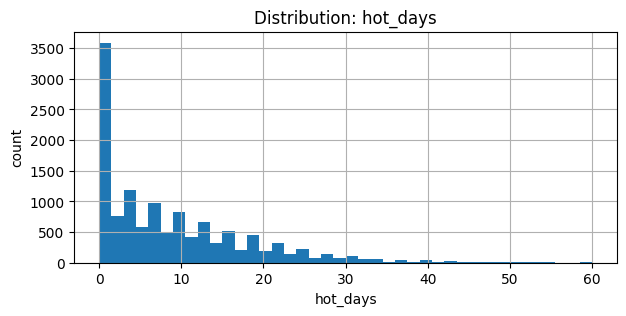

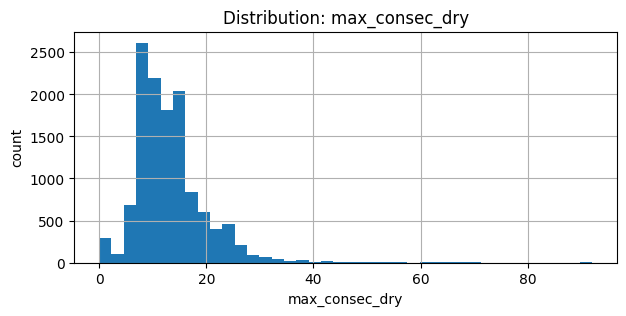

In [89]:
# Cell — visualize (no seaborn): histograms for stress features
import matplotlib.pyplot as plt

for col in ["hot_days", "max_consec_dry"]:
    plt.figure(figsize=(7,3))
    feat[col].hist(bins=40)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()


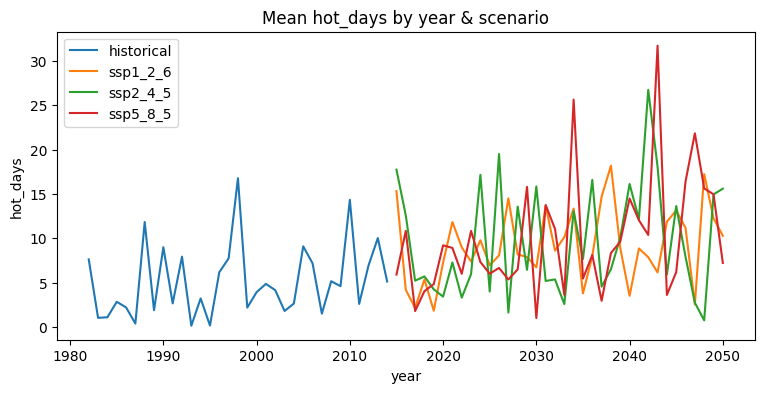

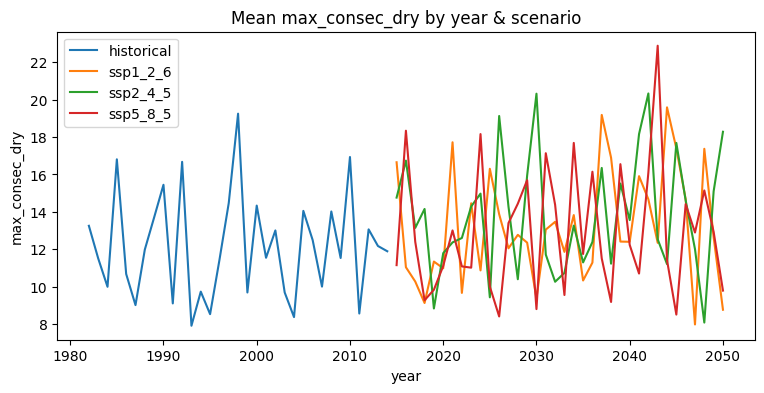

In [90]:
# Cell — scenario comparison over time (mean stress per year)
import matplotlib.pyplot as plt

for col in ["hot_days", "max_consec_dry"]:
    plt.figure(figsize=(9,4))
    for sc, g in feat.groupby("scenario"):
        g2 = g.groupby("year")[col].mean().sort_index()
        plt.plot(g2.index, g2.values, label=sc)
    plt.title(f"Mean {col} by year & scenario")
    plt.xlabel("year")
    plt.ylabel(col)
    plt.legend()
    plt.show()


In [91]:
# Cell — check your season & thresholds quickly by recomputing stress features with alternative settings
# (run this only if you suspect hot_days ~ all zeros)
def build_feat_from_w(w, grow_start=3, grow_end=6, tbase=5.0, heat_th=30.0, dry_th=1.0):
    w = w.copy()
    w["month"] = w["time"].dt.month
    gs = w[(w["month"] >= grow_start) & (w["month"] <= grow_end)].copy()

    gs["hot_day"] = (gs["daily_maximum_near_surface_air_temperature"] > heat_th).astype(int)
    gs["dry_day"] = (gs["precipitation_mm_day"] < dry_th).astype(int)
    gs["gdd_day"] = np.maximum(gs["near_surface_air_temperature"] - tbase, 0.0)

    def max_consecutive_ones(x: pd.Series) -> int:
        run = best = 0
        for v in x.values:
            if v == 1:
                run += 1
                best = max(best, run)
            else:
                run = 0
        return best

    feat_alt = (
        gs.groupby(["scenario","code_dep","nom_dep","year"], as_index=False)
          .agg(
              tmean_gs=("near_surface_air_temperature","mean"),
              tmax_gs=("daily_maximum_near_surface_air_temperature","mean"),
              prcp_gs=("precipitation_mm_day","sum"),
              hot_days=("hot_day","sum"),
              gdd=("gdd_day","sum"),
              max_consec_dry=("dry_day", max_consecutive_ones),
              n_days=("dry_day","size")
          )
    )
    return feat_alt

# Example alt configs to test quickly:
feat_alt1 = build_feat_from_w(w, grow_start=3, grow_end=7, heat_th=28.0, dry_th=2.0)
feat_alt2 = build_feat_from_w(w, grow_start=4, grow_end=8, heat_th=30.0, dry_th=1.0)

print("Original hot_days summary:")
print(feat["hot_days"].describe())

print("\nAlt1 (Mar–Jul, heat>28C, dry<2mm/day) hot_days summary:")
print(feat_alt1["hot_days"].describe())

print("\nAlt2 (Apr–Aug, heat>30C, dry<1mm/day) hot_days summary:")
print(feat_alt2["hot_days"].describe())


Original hot_days summary:
count    12549.000000
mean         8.529763
std          9.103153
min          0.000000
25%          1.000000
50%          6.000000
75%         13.000000
max         60.000000
Name: hot_days, dtype: float64

Alt1 (Mar–Jul, heat>28C, dry<2mm/day) hot_days summary:
count    12549.000000
mean        14.240258
std         11.828726
min          0.000000
25%          4.000000
50%         12.000000
75%         22.000000
max         70.000000
Name: hot_days, dtype: float64

Alt2 (Apr–Aug, heat>30C, dry<1mm/day) hot_days summary:
count    12549.000000
mean        15.240816
std         13.783882
min          0.000000
25%          4.000000
50%         12.000000
75%         23.000000
max         87.000000
Name: hot_days, dtype: float64


In [92]:
# Cell — Resilience Index (0–100) per department, per scenario + scenario-robust summary
import numpy as np
import pandas as pd

# ---------- CONFIG ----------
FUTURE_START, FUTURE_END = 2040, 2050
BASELINE_START, BASELINE_END = 2004, 2014          # keep aligned with your baseline choice
SCENARIOS_FUTURE = ["ssp1_2_6", "ssp2_4_5", "ssp5_8_5"]

# departments highlighted in interview minutes (normalized names used in your pipeline)
focus_deps = ["essonne", "somme", "cher", "haute_garonne", "isere"]

# ---------- INPUTS ----------
# expects:
# 1) proj: has columns ["scenario","code_dep","nom_dep","year","dep_norm","pred_yield","baseline_yield","yield_change_pct"]
# If baseline_yield isn't present in proj, we rebuild it below from your barley dataframe if available.

required_cols = {"scenario","year","dep_norm","pred_yield"}
missing = required_cols - set(proj.columns)
if missing:
    raise ValueError(f"proj is missing required columns: {missing}")

df = proj.copy()

# Ensure baseline_yield exists (if not, try to rebuild from `barley` if present in memory)
if "baseline_yield" not in df.columns:
    try:
        baseline = (
            barley[(barley["year"]>=BASELINE_START) & (barley["year"]<=BASELINE_END)]
            .groupby("dep_norm", as_index=False)["yield"].mean()
            .rename(columns={"yield":"baseline_yield"})
        )
        df = df.merge(baseline, on="dep_norm", how="left")
    except NameError:
        raise ValueError("baseline_yield not found in proj and `barley` dataframe not found to rebuild it.")

# Filter future scenario years
future = df[
    (df["scenario"].isin(SCENARIOS_FUTURE)) &
    (df["year"].between(FUTURE_START, FUTURE_END))
].dropna(subset=["pred_yield","baseline_yield"]).copy()

# Compute % change vs baseline if needed
if "yield_change_pct" not in future.columns:
    future["yield_change_pct"] = (future["pred_yield"] - future["baseline_yield"]) / future["baseline_yield"] * 100

# ---------- METRICS ----------
# For each dep x scenario: level, volatility, downside risk, tail
def downside_share(x, threshold_pct=-10.0):
    # share of years where yield_change_pct < threshold_pct
    return float((x < threshold_pct).mean())

def tail_p10(x):
    return float(np.percentile(x, 10))

metrics = (
    future
    .groupby(["dep_norm","scenario"], as_index=False)
    .agg(
        mean_yield=("pred_yield","mean"),
        std_yield=("pred_yield","std"),
        min_yield=("pred_yield","min"),
        p10_yield=("pred_yield", tail_p10),
        mean_change_pct=("yield_change_pct","mean"),
        std_change_pct=("yield_change_pct","std"),
        downside_share_10pct=("yield_change_pct", lambda s: downside_share(s, -10.0)),
    )
)

# Scenario spread per department (how sensitive to scenario assumptions)
# Using mean_change_pct as the comparable "impact" number
spread = (
    metrics.pivot(index="dep_norm", columns="scenario", values="mean_change_pct")
    .rename_axis(None, axis=1)
    .reset_index()
)

# If any scenario missing, spread will be NaN; that's okay but we'll handle later
spread["scenario_spread_pct"] = spread.max(axis=1, numeric_only=True) - spread.min(axis=1, numeric_only=True)

# Merge spread back into long metrics then create scenario-robust summary per dep
metrics = metrics.merge(spread[["dep_norm","scenario_spread_pct"]], on="dep_norm", how="left")

# ---------- RESILIENCE INDEX DESIGN ----------
# Intuition (higher is better):
# + Higher mean_change_pct (level benefit)
# - Lower volatility (std_change_pct)
# - Lower downside probability (downside_share_10pct)
# - Lower scenario uncertainty (scenario_spread_pct)

# We build a dept-level (scenario-robust) view by averaging across scenarios
dept = (
    metrics.groupby("dep_norm", as_index=False)
    .agg(
        mean_change_pct=("mean_change_pct","mean"),
        std_change_pct=("std_change_pct","mean"),
        downside_share_10pct=("downside_share_10pct","mean"),
        scenario_spread_pct=("scenario_spread_pct","mean"),
        mean_yield=("mean_yield","mean"),
    )
)

# Robust scaling to 0–1 so weights are interpretable and resistant to outliers
def robust_01(s):
    lo, hi = np.nanpercentile(s, 5), np.nanpercentile(s, 95)
    if np.isclose(hi, lo):
        return pd.Series(np.zeros(len(s)), index=s.index)
    return ((s - lo) / (hi - lo)).clip(0, 1)

# Normalize components (0–1)
# Benefit: mean_change_pct (higher better)
dept["score_level"] = robust_01(dept["mean_change_pct"])

# Penalties: lower is better, so invert after scaling
dept["score_volatility"] = 1 - robust_01(dept["std_change_pct"])
dept["score_downside"]   = 1 - robust_01(dept["downside_share_10pct"])
dept["score_uncertainty"]= 1 - robust_01(dept["scenario_spread_pct"])

# Weights (tunable, but these are very "consulting-friendly")
W_LEVEL = 0.40
W_VOL   = 0.25
W_DOWN  = 0.25
W_UNC   = 0.10

dept["resilience_index_0_100"] = 100 * (
    W_LEVEL * dept["score_level"] +
    W_VOL   * dept["score_volatility"] +
    W_DOWN  * dept["score_downside"] +
    W_UNC   * dept["score_uncertainty"]
)

dept = dept.sort_values("resilience_index_0_100", ascending=False)

# ---------- OUTPUTS ----------
print(f"Resilience Index computed for {dept.shape[0]} departments "
      f"({FUTURE_START}-{FUTURE_END}, scenarios={SCENARIOS_FUTURE}).")

# Top/bottom snapshot
display(dept.head(10))
display(dept.tail(10))

# Focus departments (from interview minutes)
focus_view = dept[dept["dep_norm"].isin(focus_deps)].copy()
focus_view = focus_view.sort_values("resilience_index_0_100", ascending=False)
print("\nFocus departments (interview minutes):")
display(focus_view)

# Optional: keep a joined table you can map later
# (resilience scores by dept_norm ready to merge with GeoDataFrame)
resilience_scores = dept[["dep_norm","resilience_index_0_100",
                          "mean_change_pct","std_change_pct",
                          "downside_share_10pct","scenario_spread_pct"]].copy()


Resilience Index computed for 89 departments (2040-2050, scenarios=['ssp1_2_6', 'ssp2_4_5', 'ssp5_8_5']).


,dep_norm,mean_change_pct,std_change_pct,downside_share_10pct,scenario_spread_pct,mean_yield,score_level,score_volatility,score_downside,score_uncertainty,resilience_index_0_100
50,loire,10.159317,3.375783,0.000000,2.330647,5.813520,0.782620,1.000000,1.000000,0.919175,90.496562
36,haute_marne,9.856381,4.867019,0.000000,4.319050,6.106687,0.768499,0.832793,1.000000,0.783188,84.391690
69,puy_de_dome,8.433722,4.230936,0.000000,4.873574,6.069380,0.702185,0.947620,1.000000,0.745264,84.230515
19,cote_d_or,7.298052,4.538884,0.000000,6.734861,6.085055,0.649247,0.892029,1.000000,0.617971,79.450309
10,aveyron,7.256084,4.745799,0.000000,5.432944,5.041283,0.647291,0.854676,1.000000,0.707009,79.328622
60,meurthe_et_moselle,8.071321,5.604933,0.000000,2.253228,6.297320,0.685292,0.699584,1.000000,0.924470,79.145963
46,isere,8.833710,6.129319,0.000000,2.443506,6.015018,0.720829,0.604921,1.000000,0.911457,78.070767
86,vosges,8.737483,4.835801,0.030303,7.548913,6.202110,0.716344,0.838429,0.909091,0.562298,77.964727
83,vaucluse,16.718417,8.979609,0.000000,0.502172,4.256516,1.000000,0.090383,1.000000,1.000000,77.259581
41,hautes_pyrenees,9.050455,6.525249,0.000000,1.727786,5.457294,0.730933,0.533447,1.000000,0.960405,77.177531


,dep_norm,mean_change_pct,std_change_pct,downside_share_10pct,scenario_spread_pct,mean_yield,score_level,score_volatility,score_downside,score_uncertainty,resilience_index_0_100
22,deux_sevres,-4.344793,7.227227,0.227273,4.931790,5.597588,0.106535,0.406725,0.318182,0.741283,29.796901
51,loire_atlantique,-5.129203,6.344270,0.242424,7.463033,5.866196,0.069971,0.566118,0.272727,0.568172,29.451672
54,lot_et_garonne,-5.645313,4.979544,0.303030,8.437064,5.199307,0.045913,0.812480,0.090909,0.501558,29.436828
43,ille_et_vilaine,-9.639915,4.784520,0.393939,4.508911,6.283703,0.000000,0.847686,0.000000,0.770204,28.894183
26,essonne,-4.072983,7.410044,0.227273,6.804183,6.541606,0.119205,0.373723,0.318182,0.613230,28.198111
62,morbihan,-10.620328,5.838165,0.515152,1.632630,6.156975,0.000000,0.657481,0.000000,0.966912,26.106137
9,aude,-3.430964,7.802167,0.212121,13.837723,4.756341,0.149131,0.302936,0.363636,0.132207,23.951648
84,vendee,-6.738366,6.868178,0.333333,4.339661,5.648989,0.000000,0.471541,0.000000,0.781779,19.606319
23,dordogne,-2.514076,7.136745,0.333333,18.994207,4.887436,0.191871,0.423059,0.000000,0.000000,18.251307
71,pyrenees_orientales,-9.213218,9.375415,0.484848,15.857970,2.712507,0.000000,0.018932,0.000000,0.000000,0.473294



Focus departments (interview minutes):


,dep_norm,mean_change_pct,std_change_pct,downside_share_10pct,scenario_spread_pct,mean_yield,score_level,score_volatility,score_downside,score_uncertainty,resilience_index_0_100
46,isere,8.833710,6.129319,0.000000,2.443506,6.015018,0.720829,0.604921,1.000000,0.911457,78.070767
78,somme,0.879436,4.441300,0.060606,4.655395,7.912998,0.350054,0.909644,0.818182,0.760186,64.799661
34,haute_garonne,5.648417,7.418472,0.030303,8.526115,5.167282,0.572352,0.372202,0.909091,0.495468,59.881071
17,cher,4.221352,5.754292,0.060606,13.614300,6.257353,0.505832,0.672621,0.818182,0.147487,58.978220
26,essonne,-4.072983,7.410044,0.227273,6.804183,6.541606,0.119205,0.373723,0.318182,0.613230,28.198111


In [94]:
# Cell — Load France departments GeoJSON (same as your pipeline)
import requests
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson"
r = requests.get(url, verify=False, timeout=60)
r.raise_for_status()

geojson_path = "departements.geojson"
with open(geojson_path, "wb") as f:
    f.write(r.content)

gdf = gpd.read_file(geojson_path)

# Mainland France only (code < "97")
gdf["code2"] = pd.to_numeric(gdf["code"].str[:2], errors="coerce")
gdf = gdf[gdf["code2"] < 97].copy()


/Users/verakrstic/BCG-Power-of-AI/.venv/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [95]:
# Cell — Build a department-level resilience index table from your existing `proj`
# (This mirrors the resilience definition you computed earlier, but keeps code_dep/nom_dep for mapping.)

FUTURE_START, FUTURE_END = 2040, 2050
SCENARIOS_FUTURE = ["ssp1_2_6", "ssp2_4_5", "ssp5_8_5"]

future = proj[
    (proj["scenario"].isin(SCENARIOS_FUTURE)) &
    (proj["year"].between(FUTURE_START, FUTURE_END))
].dropna(subset=["pred_yield", "baseline_yield"]).copy()

if "yield_change_pct" not in future.columns:
    future["yield_change_pct"] = (future["pred_yield"] - future["baseline_yield"]) / future["baseline_yield"] * 100

def downside_share(x, threshold_pct=-10.0):
    return float((x < threshold_pct).mean())

metrics = (
    future
    .groupby(["dep_norm","scenario"], as_index=False)
    .agg(
        mean_change_pct=("yield_change_pct","mean"),
        std_change_pct=("yield_change_pct","std"),
        downside_share_10pct=("yield_change_pct", lambda s: downside_share(s, -10.0)),
    )
)

spread = (
    metrics.pivot(index="dep_norm", columns="scenario", values="mean_change_pct")
    .reset_index()
)
spread["scenario_spread_pct"] = spread.max(axis=1, numeric_only=True) - spread.min(axis=1, numeric_only=True)

metrics = metrics.merge(spread[["dep_norm","scenario_spread_pct"]], on="dep_norm", how="left")

dept = (
    metrics.groupby("dep_norm", as_index=False)
    .agg(
        mean_change_pct=("mean_change_pct","mean"),
        std_change_pct=("std_change_pct","mean"),
        downside_share_10pct=("downside_share_10pct","mean"),
        scenario_spread_pct=("scenario_spread_pct","mean"),
    )
)

# Robust scaling to 0–1
def robust_01(s):
    lo, hi = np.nanpercentile(s, 5), np.nanpercentile(s, 95)
    if np.isclose(hi, lo):
        return pd.Series(np.zeros(len(s)), index=s.index)
    return ((s - lo) / (hi - lo)).clip(0, 1)

dept["score_level"] = robust_01(dept["mean_change_pct"])
dept["score_volatility"] = 1 - robust_01(dept["std_change_pct"])
dept["score_downside"] = 1 - robust_01(dept["downside_share_10pct"])
dept["score_uncertainty"] = 1 - robust_01(dept["scenario_spread_pct"])

W_LEVEL, W_VOL, W_DOWN, W_UNC = 0.40, 0.25, 0.25, 0.10
dept["resilience_index_0_100"] = 100 * (
    W_LEVEL * dept["score_level"]
    + W_VOL * dept["score_volatility"]
    + W_DOWN * dept["score_downside"]
    + W_UNC * dept["score_uncertainty"]
)

# Keep a mapping key to GeoJSON: code_dep (2-digit) + nom_dep
dep_keys = (
    proj[["dep_norm","code_dep","nom_dep"]]
    .drop_duplicates()
    .assign(code_dep=lambda d: d["code_dep"].astype(str).str.zfill(2))
)

res_map = dep_keys.merge(dept, on="dep_norm", how="left")
print("Departments with resilience score:", res_map["resilience_index_0_100"].notna().sum())
res_map.head()


Departments with resilience score: 89


,dep_norm,code_dep,nom_dep,mean_change_pct,std_change_pct,downside_share_10pct,scenario_spread_pct,score_level,score_volatility,score_downside,score_uncertainty,resilience_index_0_100
0,ain,01,Ain,-2.561056,5.337650,0.121212,3.929712,0.189681,0.747834,0.636364,0.809815,50.290328
1,aisne,02,Aisne,1.943165,4.966366,0.030303,8.159560,0.399638,0.814859,0.909091,0.520536,64.289612
2,allier,03,Allier,5.167908,5.393345,0.030303,2.452633,0.549954,0.737780,0.909091,0.910832,72.278255
3,alpes_de_haute_provence,04,Alpes_de_Haute_Provence,20.299400,9.410812,0.000000,6.396401,1.000000,0.012542,1.000000,0.641118,71.724729
4,hautes_alpes,05,Hautes_Alpes,3.489419,4.331234,0.000000,2.191842,0.471714,0.929514,1.000000,0.928668,76.393073


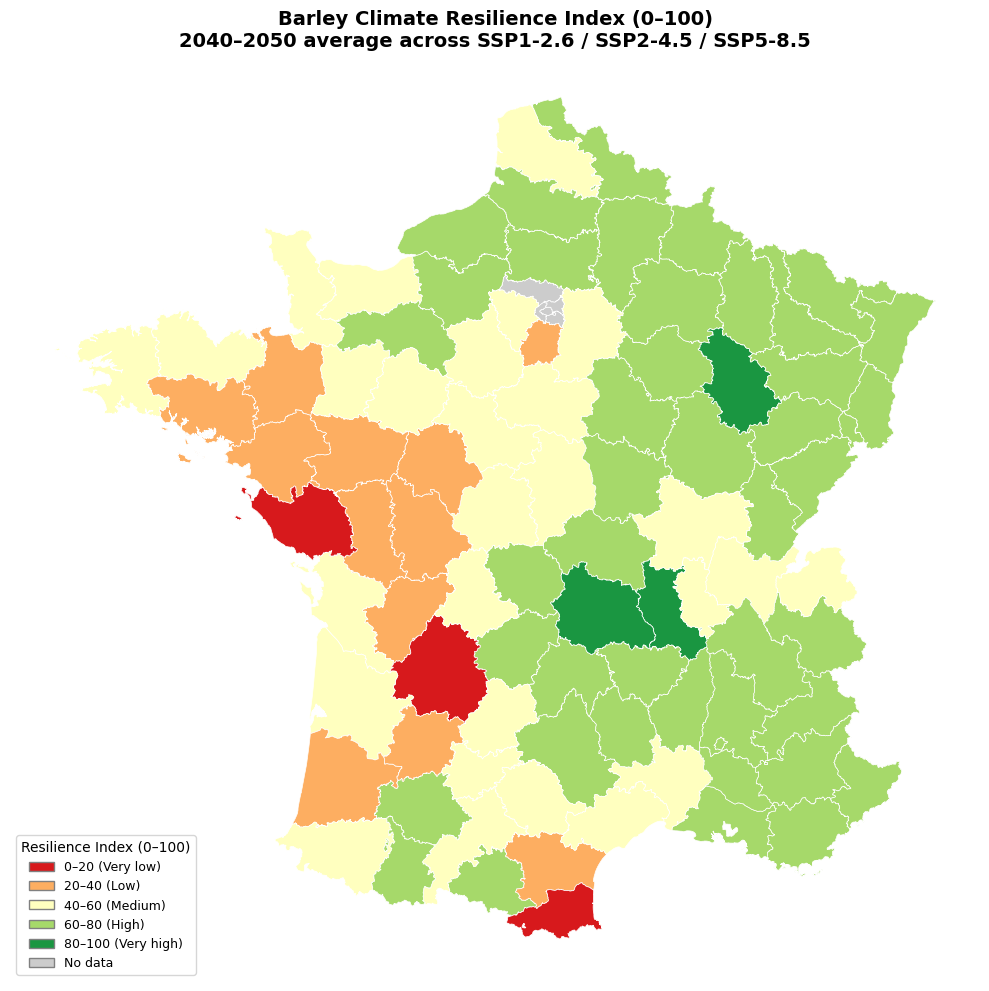

In [96]:
# Cell — Merge resilience into geometry and plot choropleth (consulting-friendly bins)

gdf_r = gdf.merge(
    res_map[["code_dep","nom_dep","resilience_index_0_100"]],
    left_on="code",
    right_on="code_dep",
    how="left"
)

# Bins for a 0–100 score
bins   = [0, 20, 40, 60, 80, 100]
labels = ["0–20 (Very low)", "20–40 (Low)", "40–60 (Medium)", "60–80 (High)", "80–100 (Very high)"]
colors = ["#d7191c", "#fdae61", "#ffffbf", "#a6d96a", "#1a9641"]  # red -> green

gdf_r["bin"] = pd.cut(gdf_r["resilience_index_0_100"], bins=bins, labels=labels, include_lowest=True)

cmap = ListedColormap(colors)
norm = BoundaryNorm(bins, cmap.N)

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# No data background
gdf_r[gdf_r["resilience_index_0_100"].isna()].plot(
    ax=ax, color="#cccccc", edgecolor="white", linewidth=0.5
)

# Data layer
gdf_r.dropna(subset=["resilience_index_0_100"]).plot(
    ax=ax,
    column="resilience_index_0_100",
    cmap=cmap,
    norm=norm,
    edgecolor="white",
    linewidth=0.5,
)

legend_patches = [Patch(facecolor=c, edgecolor="grey", label=l) for c, l in zip(colors, labels)]
legend_patches.append(Patch(facecolor="#cccccc", edgecolor="grey", label="No data"))
ax.legend(handles=legend_patches, loc="lower left", fontsize=9,
          title="Resilience Index (0–100)", title_fontsize=10, frameon=True)

ax.set_title(
    f"Barley Climate Resilience Index (0–100)\n"
    f"{FUTURE_START}–{FUTURE_END} average across SSP1-2.6 / SSP2-4.5 / SSP5-8.5",
    fontsize=14, fontweight="bold"
)
ax.set_axis_off()

plt.tight_layout()
plt.show()


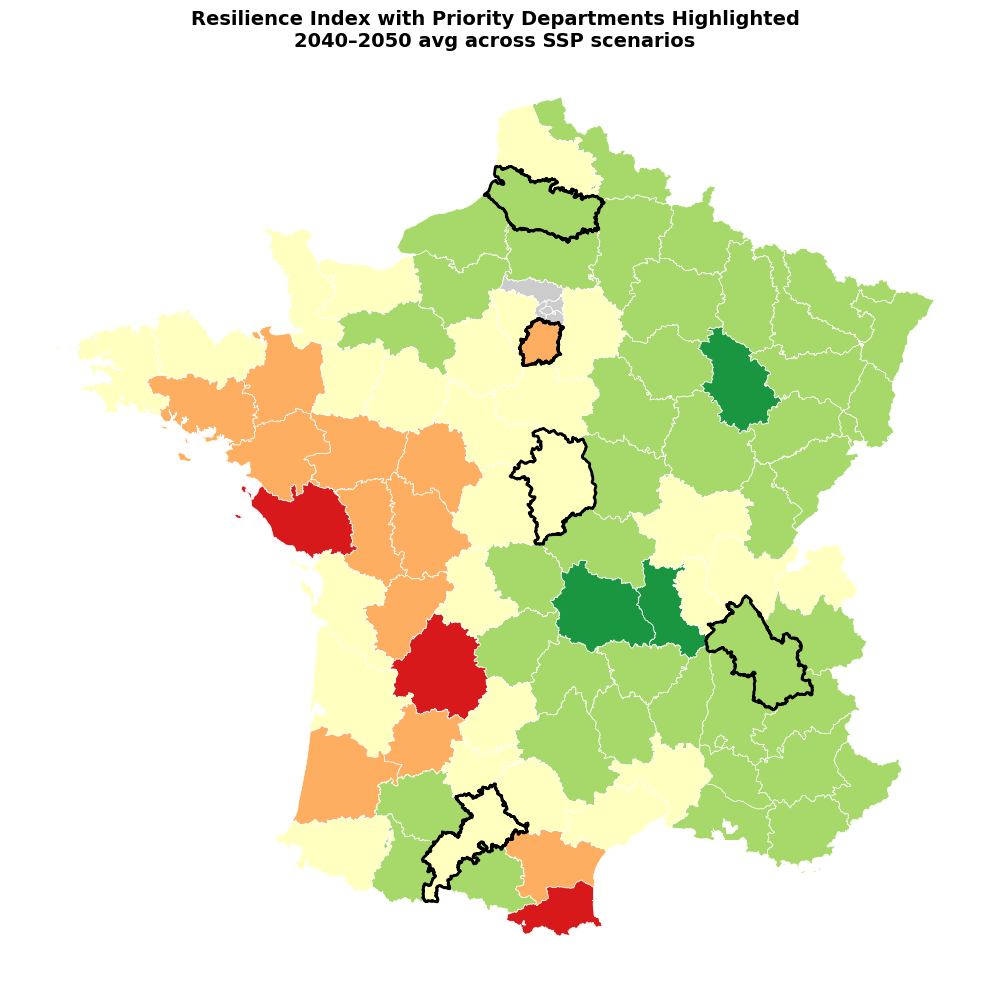

Highlighted department codes: ['18', '31', '38', '80', '91']


,nom_dep,code_dep,resilience_index_0_100
36,Isere,38,78.070767
77,Somme,80,64.799661
29,Haute_Garonne,31,59.881071
17,Cher,18,58.978220
88,Essonne,91,28.198111


In [97]:
# Cell — (Optional) Highlight the 5 interview-minute departments on the map
# Uses dep_norm list: ["essonne","somme","cher","haute_garonne","isere"]

focus_deps = ["essonne", "somme", "cher", "haute_garonne", "isere"]
focus_codes = res_map.loc[res_map["dep_norm"].isin(focus_deps), "code_dep"].tolist()

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

gdf_r[gdf_r["resilience_index_0_100"].isna()].plot(
    ax=ax, color="#cccccc", edgecolor="white", linewidth=0.5
)
gdf_r.dropna(subset=["resilience_index_0_100"]).plot(
    ax=ax,
    column="resilience_index_0_100",
    cmap=cmap,
    norm=norm,
    edgecolor="white",
    linewidth=0.5,
)

# Outline focus depts in black
gdf_r[gdf_r["code"].isin(focus_codes)].plot(
    ax=ax, facecolor="none", edgecolor="black", linewidth=2
)

ax.set_title(
    f"Resilience Index with Priority Departments Highlighted\n"
    f"{FUTURE_START}–{FUTURE_END} avg across SSP scenarios",
    fontsize=14, fontweight="bold"
)
ax.set_axis_off()
plt.tight_layout()
plt.show()

print("Highlighted department codes:", focus_codes)
res_map[res_map["dep_norm"].isin(focus_deps)][["nom_dep","code_dep","resilience_index_0_100"]].sort_values("resilience_index_0_100", ascending=False)


In [98]:
# Cell — (1) Compute Resilience Index using ONLY SSP2-4.5 (middle) + SSP5-8.5 (pessimistic)
import numpy as np
import pandas as pd

# ----- CONFIG -----
FUTURE_START, FUTURE_END = 2040, 2050
SCENARIOS = ["ssp2_4_5", "ssp5_8_5"]  # middle + pessimistic

# ----- INPUT CHECK -----
req = {"scenario","year","dep_norm","pred_yield","baseline_yield"}
missing = req - set(proj.columns)
if missing:
    raise ValueError(f"proj missing columns: {missing}")

future = proj[
    (proj["scenario"].isin(SCENARIOS)) &
    (proj["year"].between(FUTURE_START, FUTURE_END))
].dropna(subset=["pred_yield","baseline_yield"]).copy()

# % change vs baseline
future["yield_change_pct"] = (future["pred_yield"] - future["baseline_yield"]) / future["baseline_yield"] * 100

def downside_share(x, threshold_pct=-10.0):
    return float((x < threshold_pct).mean())

def robust_01(s):
    lo, hi = np.nanpercentile(s, 5), np.nanpercentile(s, 95)
    if np.isclose(hi, lo):
        return pd.Series(np.zeros(len(s)), index=s.index)
    return ((s - lo) / (hi - lo)).clip(0, 1)

# Metrics per dep x scenario
metrics = (
    future.groupby(["dep_norm","scenario"], as_index=False)
          .agg(
              mean_change_pct=("yield_change_pct","mean"),
              std_change_pct=("yield_change_pct","std"),
              downside_share_10pct=("yield_change_pct", lambda s: downside_share(s, -10.0)),
          )
)

# Scenario spread penalty (difference between SSP5 and SSP2 means)
spread = (
    metrics.pivot(index="dep_norm", columns="scenario", values="mean_change_pct")
           .reset_index()
)
spread["scenario_spread_pct"] = spread.max(axis=1, numeric_only=True) - spread.min(axis=1, numeric_only=True)

metrics = metrics.merge(spread[["dep_norm","scenario_spread_pct"]], on="dep_norm", how="left")

# Average across the two scenarios -> scenario-robust department summary
dept = (
    metrics.groupby("dep_norm", as_index=False)
           .agg(
               mean_change_pct=("mean_change_pct","mean"),
               std_change_pct=("std_change_pct","mean"),
               downside_share_10pct=("downside_share_10pct","mean"),
               scenario_spread_pct=("scenario_spread_pct","mean"),
           )
)

# Normalize components (0–1) then combine to 0–100 index
dept["score_level"]       = robust_01(dept["mean_change_pct"])              # higher better
dept["score_volatility"]  = 1 - robust_01(dept["std_change_pct"])          # lower better
dept["score_downside"]    = 1 - robust_01(dept["downside_share_10pct"])    # lower better
dept["score_uncertainty"] = 1 - robust_01(dept["scenario_spread_pct"])     # lower better

W_LEVEL, W_VOL, W_DOWN, W_UNC = 0.40, 0.25, 0.25, 0.10
dept["resilience_index_0_100"] = 100 * (
    W_LEVEL * dept["score_level"]
    + W_VOL * dept["score_volatility"]
    + W_DOWN * dept["score_downside"]
    + W_UNC * dept["score_uncertainty"]
)

dept = dept.sort_values("resilience_index_0_100", ascending=False).reset_index(drop=True)

print(f"Resilience Index computed for {dept.shape[0]} departments using {SCENARIOS} ({FUTURE_START}-{FUTURE_END}).")
display(dept.head(10))
display(dept.tail(10))

# Keep for mapping later
resilience_scores_mid_pess = dept[[
    "dep_norm","resilience_index_0_100","mean_change_pct","std_change_pct",
    "downside_share_10pct","scenario_spread_pct"
]].copy()


Resilience Index computed for 89 departments using ['ssp2_4_5', 'ssp5_8_5'] (2040-2050).


,dep_norm,mean_change_pct,std_change_pct,downside_share_10pct,scenario_spread_pct,score_level,score_volatility,score_downside,score_uncertainty,resilience_index_0_100
0,loire,9.652669,3.744995,0.000000,1.621410,0.770328,1.000000,1.000,0.894794,89.761073
1,haute_marne,10.051302,4.672109,0.000000,4.319050,0.788540,0.883184,1.000,0.719757,85.818755
2,aveyron,8.173400,3.707208,0.000000,5.361991,0.702749,1.000000,1.000,0.652085,84.630806
3,puy_de_dome,7.741598,4.186225,0.000000,4.873574,0.683022,0.968861,1.000,0.683776,83.380185
4,cote_d_or,7.831873,4.320986,0.000000,6.734861,0.687146,0.945098,1.000,0.563006,81.743380
5,hautes_pyrenees,9.479742,6.007760,0.000000,0.879849,0.762428,0.647667,1.000,0.942911,81.117898
6,isere,9.330064,5.896386,0.000000,1.908889,0.755590,0.667305,1.000,0.876141,80.667652
7,moselle,9.555153,5.336976,0.000000,8.681780,0.765873,0.765947,1.000,0.436679,79.150401
8,meurthe_et_moselle,7.911144,5.702489,0.000000,2.253228,0.690768,0.701495,1.000,0.853798,78.706085
9,vosges,8.934717,4.713735,0.045455,7.548913,0.737529,0.875844,0.875,0.510186,78.374133


,dep_norm,mean_change_pct,std_change_pct,downside_share_10pct,scenario_spread_pct,score_level,score_volatility,score_downside,score_uncertainty,resilience_index_0_100
79,dordogne,-0.444155,6.707505,0.272727,18.994207,0.309062,0.524279,0.250,0.000000,31.719452
80,indre_et_loire,-2.586878,6.666899,0.272727,12.346691,0.211173,0.531439,0.250,0.198880,29.971703
81,landes,-7.490234,4.438746,0.500000,6.865303,0.000000,0.924334,0.000,0.554542,28.653761
82,maine_et_loire,-6.732648,5.524647,0.363636,6.776483,0.021776,0.732855,0.000,0.560305,24.795475
83,loire_atlantique,-5.238686,6.954197,0.318182,7.463033,0.090027,0.480779,0.125,0.515758,23.903150
84,morbihan,-10.211103,6.536962,0.454545,0.809909,0.000000,0.554351,0.000,0.947449,23.333270
85,vendee,-7.670168,6.307966,0.409091,3.088509,0.000000,0.594731,0.000,0.799601,22.864272
86,deux_sevres,-6.810688,8.099599,0.363636,0.000000,0.018211,0.278808,0.000,1.000000,17.698659
87,essonne,-7.475074,8.292080,0.363636,0.000000,0.000000,0.244868,0.000,1.000000,16.121699
88,pyrenees_orientales,-5.756067,8.992096,0.363636,10.973030,0.066391,0.121433,0.000,0.288011,8.571559


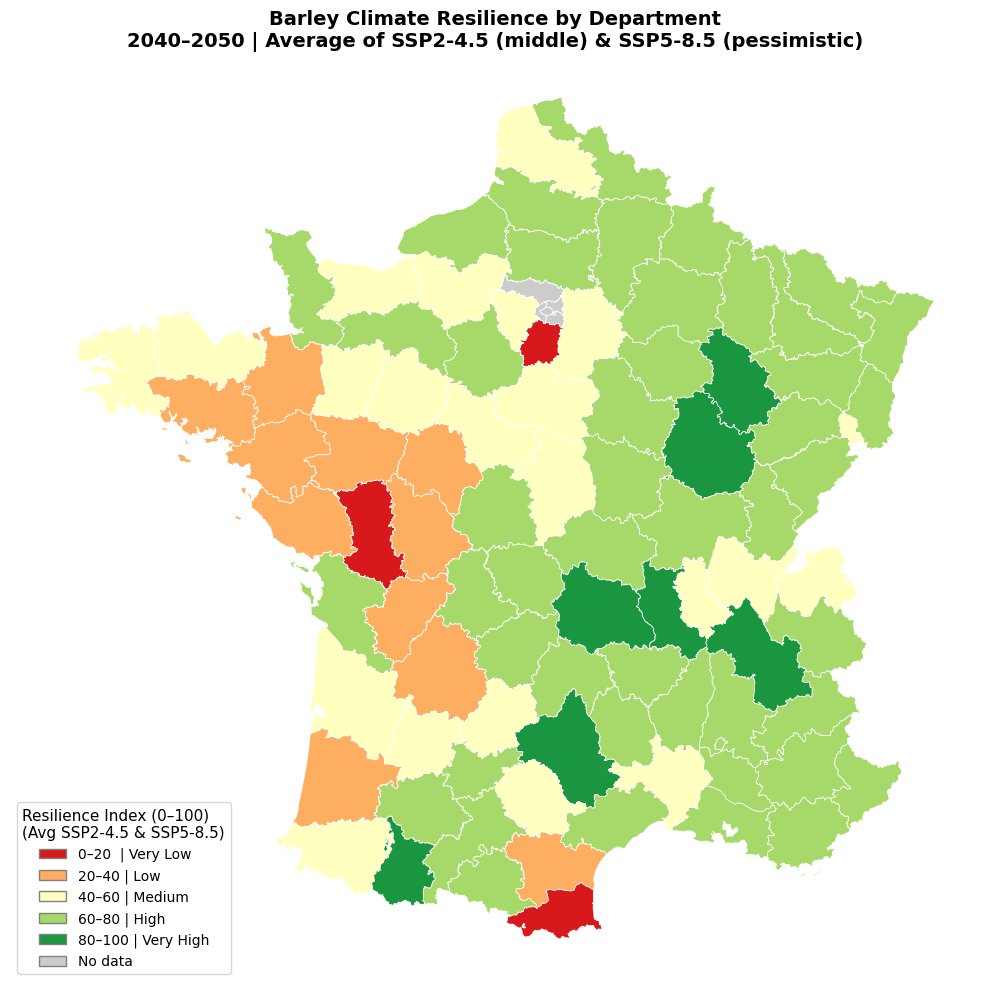

In [99]:
# Cell — (2) Map the mid+pessimistic Resilience Index (0–100) by department (France choropleth)

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm

# --- build code_dep mapping key from your existing proj ---
dep_keys = (
    proj[["dep_norm","code_dep","nom_dep"]]
    .drop_duplicates()
    .assign(code_dep=lambda d: d["code_dep"].astype(str).str.zfill(2))
)

res_map = dep_keys.merge(resilience_scores_mid_pess, on="dep_norm", how="left")

# --- load geojson if not already loaded ---
# expects gdf already exists from your earlier geojson cell
# Mainland France only (code < "97")
gdf_plot = gdf.copy()
gdf_plot["code2"] = pd.to_numeric(gdf_plot["code"].str[:2], errors="coerce")
gdf_plot = gdf_plot[gdf_plot["code2"] < 97].copy()

# --- merge resilience scores to geometry ---
gdf_r = gdf_plot.merge(
    res_map[["code_dep","nom_dep","resilience_index_0_100"]],
    left_on="code",
    right_on="code_dep",
    how="left"
)

# --- bins and legend ---
bins   = [0, 20, 40, 60, 80, 100]
labels = ["0–20  | Very Low", "20–40 | Low", "40–60 | Medium", "60–80 | High", "80–100 | Very High"]
colors = ["#d7191c", "#fdae61", "#ffffbf", "#a6d96a", "#1a9641"]  # red -> green

cmap = ListedColormap(colors)
norm = BoundaryNorm(bins, cmap.N)

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# No data layer
gdf_r[gdf_r["resilience_index_0_100"].isna()].plot(
    ax=ax, color="#cccccc", edgecolor="white", linewidth=0.5
)

# Data layer
gdf_r.dropna(subset=["resilience_index_0_100"]).plot(
    ax=ax,
    column="resilience_index_0_100",
    cmap=cmap,
    norm=norm,
    edgecolor="white",
    linewidth=0.5,
)

legend_elements = [Patch(facecolor=c, edgecolor="grey", label=l) for c, l in zip(colors, labels)]
legend_elements.append(Patch(facecolor="#cccccc", edgecolor="grey", label="No data"))

ax.legend(
    handles=legend_elements,
    title="Resilience Index (0–100)\n(Avg SSP2-4.5 & SSP5-8.5)",
    loc="lower left",
    fontsize=10,
    title_fontsize=11,
    frameon=True
)

ax.set_title(
    f"Barley Climate Resilience by Department\n"
    f"{FUTURE_START}–{FUTURE_END} | Average of SSP2-4.5 (middle) & SSP5-8.5 (pessimistic)",
    fontsize=14,
    fontweight="bold"
)

ax.set_axis_off()
plt.tight_layout()
plt.show()


Highlighting codes: ['18', '31', '38', '80', '91']
            nom_dep code_dep
612            Cher       18
1044  Haute_Garonne       31
1296          Isere       38
2772          Somme       80
3168        Essonne       91


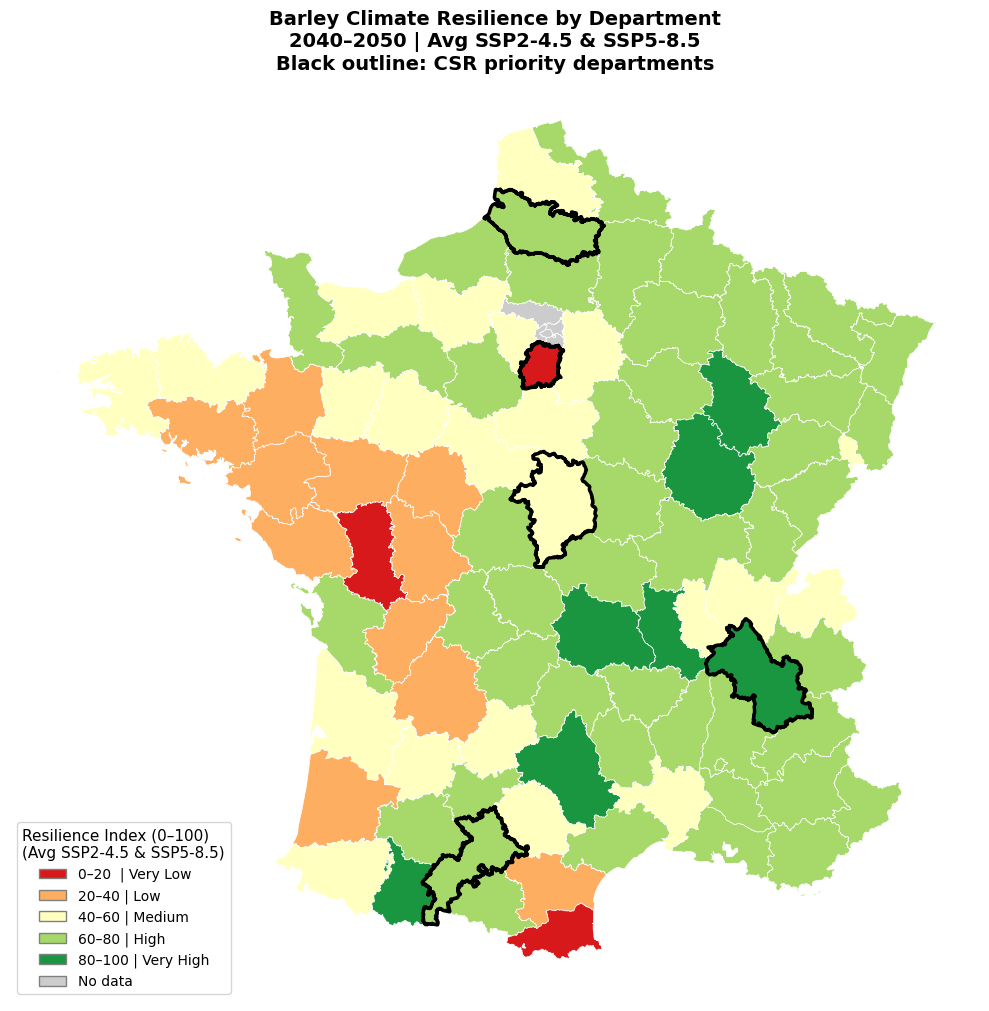

In [101]:
# Cell — Map + highlight Laure’s priority departments (bold outline)

import matplotlib.pyplot as plt

# Laure’s departments from interview minutes
laure_focus = ["Essonne", "Somme", "Cher", "Haute_Garonne", "Isere"]

# Normalize to match your dep_norm convention
import unicodedata, re
def norm_dep(s: str) -> str:
    s = str(s)
    s = unicodedata.normalize("NFKD", s).encode("ascii","ignore").decode("ascii")
    s = s.lower().replace("'", "")
    s = re.sub(r"[\s\-]+", "_", s)
    s = re.sub(r"[^a-z0-9_]", "", s)
    return s

focus_norm = [norm_dep(x) for x in laure_focus]

# Get the department codes to outline on the map
focus_codes = (
    dep_keys.loc[dep_keys["dep_norm"].isin(focus_norm), "code_dep"]
    .astype(str).str.zfill(2)
    .unique()
    .tolist()
)

print("Highlighting codes:", focus_codes)
print(dep_keys.loc[dep_keys["dep_norm"].isin(focus_norm), ["nom_dep","code_dep"]].drop_duplicates())

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# No data layer
gdf_r[gdf_r["resilience_index_0_100"].isna()].plot(
    ax=ax, color="#cccccc", edgecolor="white", linewidth=0.5
)

# Data layer
gdf_r.dropna(subset=["resilience_index_0_100"]).plot(
    ax=ax,
    column="resilience_index_0_100",
    cmap=cmap,
    norm=norm,
    edgecolor="white",
    linewidth=0.5,
)

# Outline Laure focus departments (bold black borders)
gdf_r[gdf_r["code"].isin(focus_codes)].plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    linewidth=2.5
)

# Legend (reuse your same legend_elements)
ax.legend(
    handles=legend_elements,
    title="Resilience Index (0–100)\n(Avg SSP2-4.5 & SSP5-8.5)",
    loc="lower left",
    fontsize=10,
    title_fontsize=11,
    frameon=True
)

ax.set_title(
    f"Barley Climate Resilience by Department\n"
    f"{FUTURE_START}–{FUTURE_END} | Avg SSP2-4.5 & SSP5-8.5\n"
    f"Black outline: CSR priority departments",
    fontsize=14,
    fontweight="bold"
)

ax.set_axis_off()
plt.tight_layout()
plt.show()
